# Visualization 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy as sp
%matplotlib inline
print("Ready...")

Ready...


In [3]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


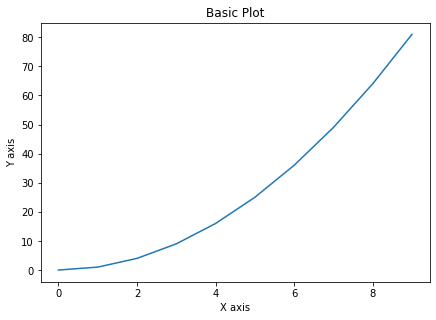

In [5]:
x=np.arange(0,10)
y=np.square(x)
fig=plt.figure()
axes=fig.add_axes([.1,.1,.9,.9]) # 1ST 2 POINTS LEFT AND BOTTOM AND NEXT 2 ARE WIDTH AND HIEGHT
axes.set_xlabel("X axis")
axes.set_ylabel("Y axis")
axes.set_title("Basic Plot")
axes.plot(x,y)

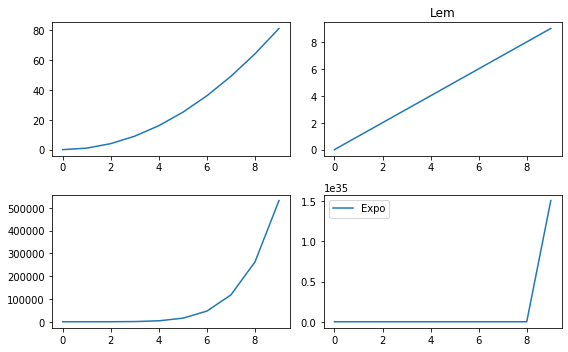

In [6]:
fig,axes=plt.subplots(figsize=(8,5),nrows=2,ncols=2) # Unpac
axes[0,0].plot(x,y)
axes[0,1].plot(x,np.sqrt(y),label="Sqrt")
axes[0,1].set_title("Lem")
axes[1,0].plot(x,y**3,label="Qube")
axes[1,1].plot(x,np.exp(y),label="Expo")
plt.legend()
plt.tight_layout() # better fitting of charts

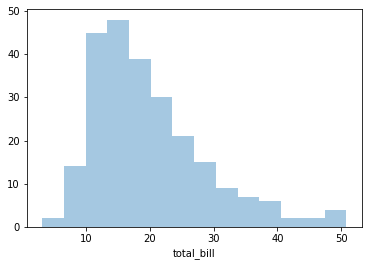

In [7]:
sns.distplot(df['total_bill'],kde=False)

In [8]:
len(df['total_bill'])

244

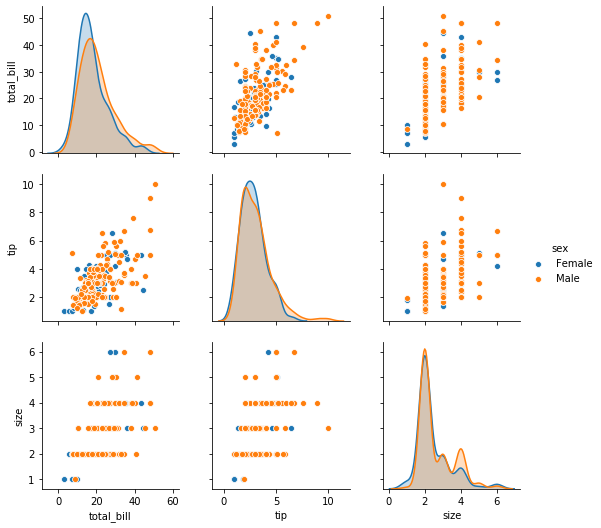

In [9]:
sns.pairplot(df,hue='sex')

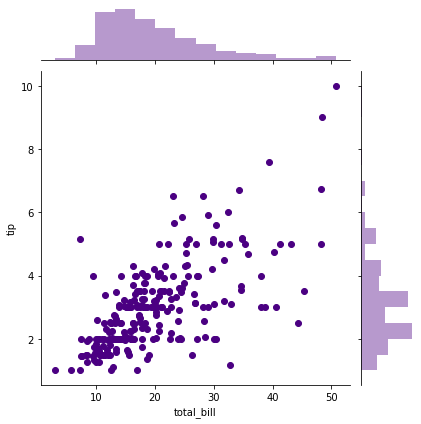

In [10]:
sns.jointplot(df['total_bill'],df['tip'],color='indigo')

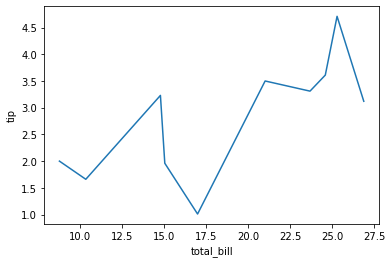

In [11]:
sns.lineplot(df['total_bill'][0:10],df['tip'][0:10])

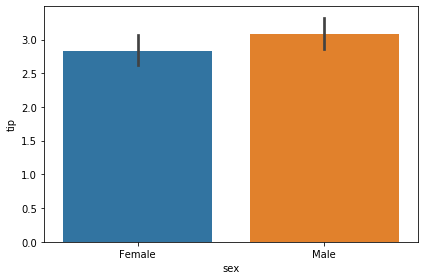

In [12]:

sns.barplot(df['sex'],df['tip'],estimator=np.mean)
plt.tight_layout()

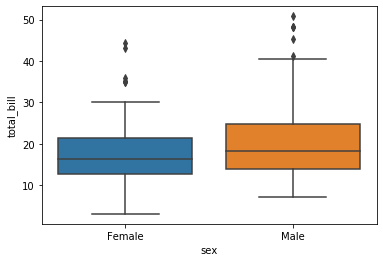

In [13]:
sns.boxplot(df['sex'],df['total_bill'])

In [14]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


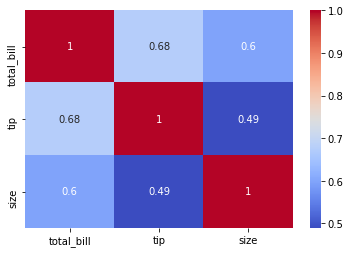

In [15]:
df1=pd.read_csv('AirPassengers.csv')
df2=pd.read_csv('tips.csv')
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

In [16]:
import datetime

df1['Month']=pd.to_datetime(df1['Month'] )
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [17]:
df1['Year']=df1['Month'].apply(lambda x : x.year)
df1['Month']=df1['Month'].apply(lambda x : x.month)

In [18]:
df1.columns=["Month","Passengers","Years"]

In [19]:
df1['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [20]:
df1.head()

,Month,Passengers,Years
0,Jan,112,1949
1,Feb,118,1949
2,Mar,132,1949
3,Apr,129,1949
4,May,121,1949


In [21]:
pvt=df1.pivot_table(values='Passengers',columns='Years',index='Month',aggfunc='mean')
pvt

Years,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Apr,129,135,163,181,235,227,269,313,348,348,396,461
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Dec,118,140,166,194,201,229,278,306,336,337,405,432
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Jan,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
Mar,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


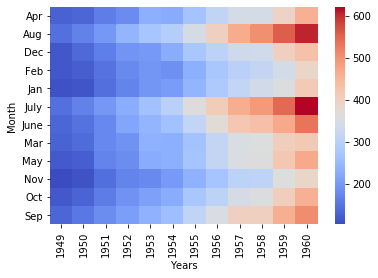

In [22]:
sns.heatmap(pvt,cmap='coolwarm')

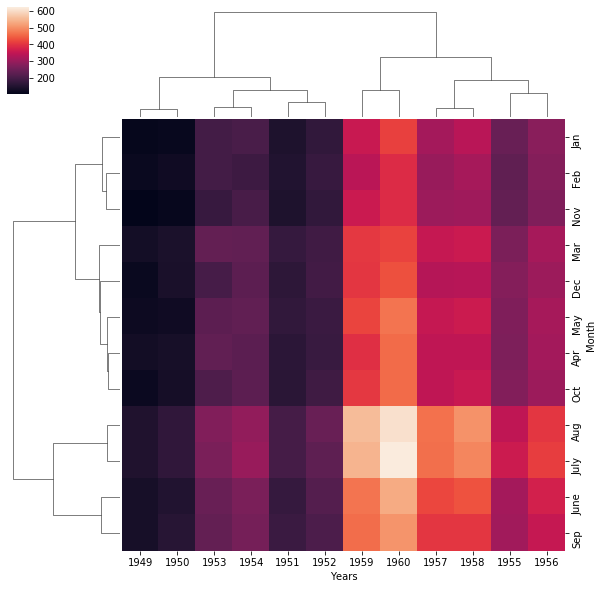

In [23]:
sns.clustermap(pvt)

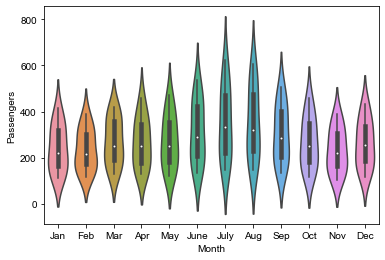

In [24]:
sns.violinplot('Month','Passengers',data=df1)
sns.set(rc={'figure.figsize':(12,10)})   # increase Size of figure


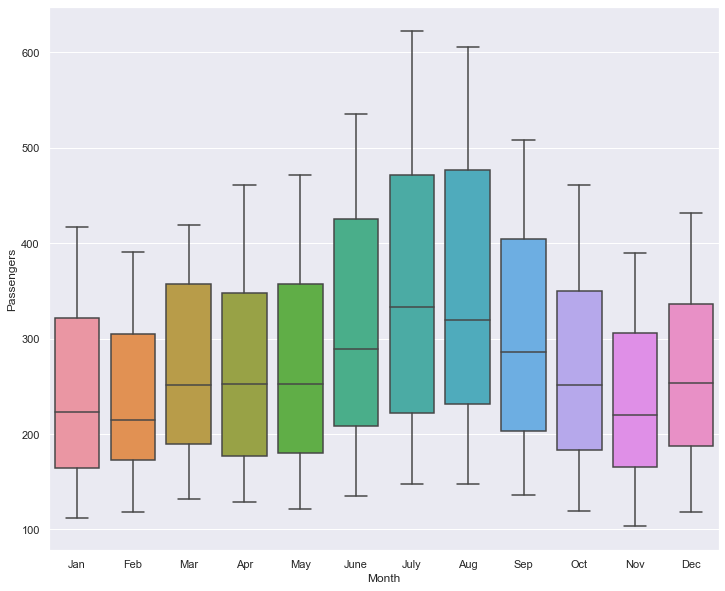

In [25]:
sns.boxplot('Month','Passengers',data=df1)
sns.set(rc={'figure.figsize':(12,10)})   # increase Size of figure


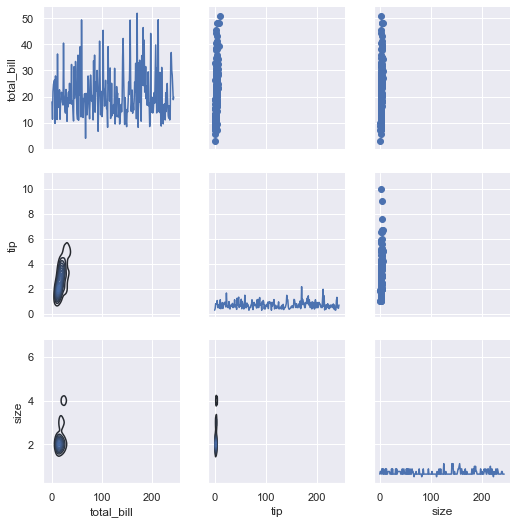

In [26]:
grd=sns.PairGrid(df)
grd.map_upper(plt.scatter) # plot from Matplotlib or Seaborn it will plot on it 
grd.map_lower (sns.kdeplot)
grd.map_diag(plt.plot)
sns.set(rc={'figure.figsize':(14,12)})   # increase Size of figure


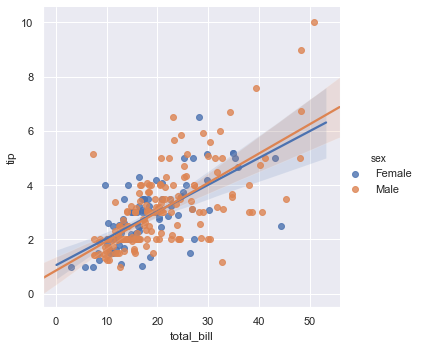

In [27]:
sns.lmplot('total_bill','tip',data=df,hue='sex') # Regression plot

## Interactive Visualization 

In [28]:
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
df1.iplot()

In [29]:
df2.iplot(kind='scatter',mode='markers')

In [30]:
df2.iplot(kind='bar')

In [31]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
df2.iplot(kind='box')

In [33]:
df2[['size','total_bill','tip']].iplot(kind='surface')

In [34]:
df2['tip'].iplot(kind='hist',bins=40)

In [35]:
df2.iplot(kind='hist')

In [36]:
df2[['total_bill','tip']].iplot(kind='spread')

In [42]:
df2.iplot(kind='bubble',x='total_bill',y='tip',size='size',colors='indigo')

In [43]:
df1.scatter_matrix()